# Calculate Yield Response to Variable Nitrogen Rates
---

**Name**: Adrian Correndo

**Semester**: Spring 2019

**Project area**: Agronomy

## **Objective**

Automating the calculation of grain yield (GY) response to different rates of nitrogen (N) fertilizer, related fertilizer use efficiencies (NUE). For each experiment, get the GY with no N added (Y0) and the maximum observed yield (Ymax). Create subgroups of experiments based on soil texture (STx).

## **Outcomes**

*.csv file with up to 8 columns: Trial, STx, Nrate, GY, Y0, Ymax, NR, and NUE, where:

**-Y0**: GY when Nrate=0;
**-Ymax**: maximum observed GY;
**-NR**: abs. nitrogen response corresponding to each fertilizer rate different from 0.

Challenge could be related to: 

i) Nrate levels (# and kg applied N) vary across trials;
ii) Y0 and Ymax values happen at **Trial** level, while the NR and NUE values, at a sub-level by a given **Trial-Nrate combination**.

## **Rationale**

Database compund by hundreds of corn nitrogen fertilizer experiments. Automating these calculations will save me a significant amount of time when processing and analyzing the database.

## **Coding**
### Importing modules and datafile

In [2]:
import pandas as pd

dirname = 'C:/Users/correndo/Desktop/Coding/project/'
filename = 'CornNFR.csv'
data = pd.read_csv(dirname + filename)
df = pd.DataFrame(data)
df.head(19)

,TRIAL,TEXT,Nrate,GY
0,39,clay,0,3.700
1,39,clay,36,5.057
2,39,clay,62,5.392
3,39,clay,89,7.774
4,39,clay,116,8.765
5,39,clay,143,9.899
6,39,clay,170,10.426
7,39,clay,178,10.789
8,39,clay,196,10.506
9,3,loamy_sand,0,9.088


### Sorting by "TRIAL" and by "Nrate" within TRIAL (both ascending)

In [3]:
sdf = df.sort_values(['TRIAL', 'Nrate'],ascending=True)
sdf = pd.DataFrame(sdf)
sdf.head(10)

,TRIAL,TEXT,Nrate,GY
329,1,silty_clay,0,13.317
330,1,silty_clay,84,14.434
331,1,silty_clay,140,15.267
332,1,silty_clay,196,15.405
333,1,silty_clay,280,15.496
334,2,silty_clay,0,6.604
335,2,silty_clay,84,10.691
336,2,silty_clay,140,11.122
337,2,silty_clay,196,11.246
338,2,silty_clay,280,11.722


### Adding a column with Y0 values

In [4]:
# Defining "trials" element as a group of rows corresponding to the same TRIAL
trials = sdf.groupby("TRIAL")
for TRIAL, trials_df in trials:
    trials_df

In [25]:
sdf_Y0 = sdf.join(trials['GY'].nth(0).rename('Y0'), 'TRIAL')
sdf_Y0.head(19)

,TRIAL,TEXT,Nrate,GY,Y0
329,1,silty_clay,0,13.317,13.317
330,1,silty_clay,84,14.434,13.317
331,1,silty_clay,140,15.267,13.317
332,1,silty_clay,196,15.405,13.317
333,1,silty_clay,280,15.496,13.317
334,2,silty_clay,0,6.604,6.604
335,2,silty_clay,84,10.691,6.604
336,2,silty_clay,140,11.122,6.604
337,2,silty_clay,196,11.246,6.604
338,2,silty_clay,280,11.722,6.604


### Adding a column with the Ymax values

In [6]:
sdf_Y0_Ymax = sdf_Y0.join(trials['GY'].max().rename('Ymax'), 'TRIAL')
sdf_Y0_Ymax.head(10)

,TRIAL,TEXT,Nrate,GY,Y0,Ymax
329,1,silty_clay,0,13.317,13.317,15.496
330,1,silty_clay,84,14.434,13.317,15.496
331,1,silty_clay,140,15.267,13.317,15.496
332,1,silty_clay,196,15.405,13.317,15.496
333,1,silty_clay,280,15.496,13.317,15.496
334,2,silty_clay,0,6.604,6.604,11.722
335,2,silty_clay,84,10.691,6.604,11.722
336,2,silty_clay,140,11.122,6.604,11.722
337,2,silty_clay,196,11.246,6.604,11.722
338,2,silty_clay,280,11.722,6.604,11.722


### Adding a column with the Max Delta-Y

In [7]:
for i in sdf_Y0_Ymax:
    DeltaY = sdf_Y0_Ymax.Ymax - sdf_Y0_Ymax.Y0
sdf_DeltaY = sdf_Y0_Ymax.join(DeltaY.rename('MaxDY'))
sdf_DeltaY.head(10)

,TRIAL,TEXT,Nrate,GY,Y0,Ymax,MaxDY
329,1,silty_clay,0,13.317,13.317,15.496,2.179
330,1,silty_clay,84,14.434,13.317,15.496,2.179
331,1,silty_clay,140,15.267,13.317,15.496,2.179
332,1,silty_clay,196,15.405,13.317,15.496,2.179
333,1,silty_clay,280,15.496,13.317,15.496,2.179
334,2,silty_clay,0,6.604,6.604,11.722,5.118
335,2,silty_clay,84,10.691,6.604,11.722,5.118
336,2,silty_clay,140,11.122,6.604,11.722,5.118
337,2,silty_clay,196,11.246,6.604,11.722,5.118
338,2,silty_clay,280,11.722,6.604,11.722,5.118


### Adding a column with N Response

In [8]:
for i in sdf_DeltaY:
    NR = sdf_DeltaY.GY - sdf_DeltaY.Y0
sdf_NR = sdf_DeltaY.join(NR.rename('NR'))
sdf_NR.head(10)

,TRIAL,TEXT,Nrate,GY,Y0,Ymax,MaxDY,NR
329,1,silty_clay,0,13.317,13.317,15.496,2.179,0.000
330,1,silty_clay,84,14.434,13.317,15.496,2.179,1.117
331,1,silty_clay,140,15.267,13.317,15.496,2.179,1.950
332,1,silty_clay,196,15.405,13.317,15.496,2.179,2.088
333,1,silty_clay,280,15.496,13.317,15.496,2.179,2.179
334,2,silty_clay,0,6.604,6.604,11.722,5.118,0.000
335,2,silty_clay,84,10.691,6.604,11.722,5.118,4.087
336,2,silty_clay,140,11.122,6.604,11.722,5.118,4.518
337,2,silty_clay,196,11.246,6.604,11.722,5.118,4.642
338,2,silty_clay,280,11.722,6.604,11.722,5.118,5.118


### New DataFrame with only N fertilized plots (deleting 0N rows)

In [9]:
Nf_plots = pd.DataFrame(sdf_NR[sdf_NR.Nrate > 0])
Nf_plots.head()

,TRIAL,TEXT,Nrate,GY,Y0,Ymax,MaxDY,NR
330,1,silty_clay,84,14.434,13.317,15.496,2.179,1.117
331,1,silty_clay,140,15.267,13.317,15.496,2.179,1.950
332,1,silty_clay,196,15.405,13.317,15.496,2.179,2.088
333,1,silty_clay,280,15.496,13.317,15.496,2.179,2.179
335,2,silty_clay,84,10.691,6.604,11.722,5.118,4.087


### Estimating N Agronomic Efficiencies

In [10]:
for i in Nf_plots:
    NAE = (Nf_plots.NR / sdf_NR.Nrate) * 1000  
sdf_NAE = Nf_plots.join(NAE.round(3).rename('NAE'))
sdf_NAE.head()

,TRIAL,TEXT,Nrate,GY,Y0,Ymax,MaxDY,NR,NAE
330,1,silty_clay,84,14.434,13.317,15.496,2.179,1.117,13.298
331,1,silty_clay,140,15.267,13.317,15.496,2.179,1.950,13.929
332,1,silty_clay,196,15.405,13.317,15.496,2.179,2.088,10.653
333,1,silty_clay,280,15.496,13.317,15.496,2.179,2.179,7.782
335,2,silty_clay,84,10.691,6.604,11.722,5.118,4.087,48.655


In [11]:
N0_plots_final = pd.DataFrame(sdf_DeltaY[sdf_DeltaY.Nrate == 0])
N0_plots_final.head()

,TRIAL,TEXT,Nrate,GY,Y0,Ymax,MaxDY
329,1,silty_clay,0,13.317,13.317,15.496,2.179
334,2,silty_clay,0,6.604,6.604,11.722,5.118
9,3,loamy_sand,0,9.088,9.088,13.150,4.062
73,4,silt_loam,0,9.742,9.742,11.473,1.731
14,5,loamy_sand,0,12.172,12.172,14.523,2.351


### How many unique N rates are in the database?
- Then, get the uniques Nrates and frequencies

In [12]:
print("The total number of N fertilized plots is:", len(Nf_plots))
Nrates = Nf_plots['Nrate'].unique().tolist()
print("The number of different N rates is:", len(Nrates))
Nrates_freq = Nf_plots['Nrate'].value_counts().tolist()

The total number of N fertilized plots is: 345
The number of different N rates is: 34


### Creating a df with all the N rates and their frequencies (count)

In [13]:
Nrates = pd.DataFrame(data=({'N rate': Nrates, 'Counts': Nrates_freq}))
Nrates = Nrates.sort_values(['N rate'],ascending=True)
Nrates.head()

,N rate,Counts
26,27,1
19,36,3
27,54,1
10,56,16
20,62,3


### How many unique types of soil texture are in the database?

In [14]:
text_class = N0_plots_final['TEXT'].unique().tolist() 
text_freq = N0_plots_final['TEXT'].value_counts().tolist()
print("The number of different soil texture classes is:", len(text_class))

The number of different soil texture classes is: 6


### Creating a df with all the Soil Texture Classes and their frequencies (count)

In [15]:
STx = pd.DataFrame(data=({'Texture Class': text_class, 'Frequency': text_freq}))
STx

,Texture Class,Frequency
0,silty_clay,36
1,loamy_sand,8
2,silt_loam,7
3,sandy_loam,4
4,clay,3
5,silty_clay_loam,1


In [ ]:
#df.sdf_NAE.to_csv('CornNAE.csv', encrypting = , )

# Example
- Two trials with different N rates

Text(0.5, 0, 'N rate (kg N/ha)')

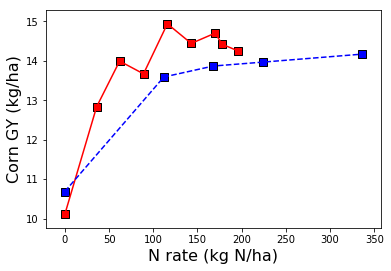

In [23]:
import matplotlib.pyplot as plt

trial_51 = pd.DataFrame(sdf[sdf.TRIAL == 51])
trial_33 = pd.DataFrame(sdf[sdf.TRIAL == 33])

plt.figure()

plt.plot(trial_51.Nrate[0:400], trial_51.GY[0:18],'-r')
plt.scatter(trial_51.Nrate[0:400], trial_51.GY[0:18], 
            s=55, 
            marker='s', 
            facecolors='r', 
            edgecolors='k')
plt.plot(trial_33.Nrate[0:400], trial_33.GY[0:18], '--b')
plt.scatter(trial_33.Nrate[0:400], trial_33.GY[0:18], 
            s=55, 
            marker='s', 
            facecolors='b', 
            edgecolors='k')

plt.ylabel('Corn GY (kg/ha)', fontsize=16)
plt.xlabel('N rate (kg N/ha)', fontsize=16)